In [27]:
import pandas as pd 
import numpy as np 
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from IPython.display import display

df_train = pd.read_csv('train.csv', index_col='Id')
df_test = pd.read_csv('test.csv', index_col='Id')
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [28]:
obj_cols = df_train.select_dtypes(include='object').columns
numeric_cols = df_train.select_dtypes(exclude='object').columns

In [29]:
missing_numeric = df_train[numeric_cols].isnull().sum()
missing_numeric = missing_numeric[missing_numeric > 0]  # Keep only columns with missing values
print(missing_numeric)


LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [30]:
#fill obj columns with None
df_train[obj_cols] = df_train[obj_cols].fillna('None')

In [31]:
# fill numeric columns with median or with 0 if absence
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].median())
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)

In [32]:
#convert categorical columns into numeric format
#df_train = pd.get_dummies(df_train, columns=obj_cols)


In [33]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [34]:
#df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

In [35]:
import scipy.stats as stats

# Fit a normal distribution to the SalePrice data
mu, sigma = stats.norm.fit(df_train['SalePrice'])

# Create a histogram of the SalePrice column
hist_data = go.Histogram(x=df_train['SalePrice'], nbinsx=50, name="Histogram", opacity=0.75, histnorm='probability density', marker=dict(color='purple'))

# Calculate the normal distribution based on the fitted parameters
x_norm = np.linspace(df_train['SalePrice'].min(), df_train['SalePrice'].max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Create the normal distribution overlay
norm_data = go.Scatter(x=x_norm, y=y_norm, mode="lines", name=f"Normal dist. (μ={mu:.2f}, σ={sigma:.2f})", line=dict(color="green"))

# Combine the histogram and the overlay
fig = go.Figure(data=[hist_data, norm_data])

# Set the layout for the plot
fig.update_layout(
    title="SalePrice Distribution",
    xaxis_title="SalePrice",
    yaxis_title="Density",
    legend_title_text="Fitted Normal Distribution",
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white')
)

# Create a Q-Q plot
qq_data = stats.probplot(df_train['SalePrice'], dist="norm")
qq_fig = px.scatter(x=qq_data[0][0], y=qq_data[0][1], labels={'x': 'Theoretical Quantiles', 'y': 'Ordered Values'}, color_discrete_sequence=["purple"])
qq_fig.update_layout(
    title="Q-Q plot",
    plot_bgcolor='rgba(32, 32, 32, 1)',
    paper_bgcolor='rgba(32, 32, 32, 1)',
    font=dict(color='white')
)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(qq_data[0][0], qq_data[0][1])
line_x = np.array(qq_data[0][0])
line_y = intercept + slope * line_x

# Add the line of best fit to the Q-Q plot
line_data = go.Scatter(x=line_x, y=line_y, mode="lines", name="Normal Line", line=dict(color="green"))

# Update the Q-Q plot with the normal line
qq_fig.add_trace(line_data)

# Show the plots
fig.show()
qq_fig.show()

In [36]:
# Explore the correlation between the features and the target
#correlation = df_train.corr()['SalePrice'].sort_values(ascending=False)
#correlation

In [37]:
#Distribution of dwelling types and their relation to sale prices?
#Does zoning impact sale price?
#Does street and alley access types effect on sale price?
#What is the Average sale price by property shape?
#Is there a Correlation between Property Age and Sale Price
#Is there a Correlation between Living Area and Sale Price
#Does price change year to year?

In [38]:
# 1. Distribution of dwelling types and their relation to sale prices
dwelling_types = df_train['BldgType'].value_counts()
dwelling_prices = df_train.groupby('BldgType')['SalePrice'].mean()

# Format labels for the second graph
formatted_dwelling_prices = ['$' + f'{value:,.2f}' for value in dwelling_prices.values]

# Create bar charts
fig1 = go.Figure(data=[go.Bar(
    x=dwelling_types.index,
    y=dwelling_types.values,
    marker_color='rgb(76, 175, 80)',
    text=dwelling_types.values,
    textposition='outside',
    width=0.4,
    marker=dict(line=dict(width=2, color='rgba(0,0,0,1)'), opacity=1)
)])
fig1.update_layout(
    title='Distribution of Building Types',
    xaxis_title='Building Type',
    yaxis_title='Count',
    plot_bgcolor='rgba(34, 34, 34, 1)',
    paper_bgcolor='rgba(34, 34, 34, 1)',
    font=dict(color='white')
)

fig2 = go.Figure(data=[go.Bar(
    x=dwelling_prices.index,
    y=dwelling_prices.values,
    marker_color='rgb(156, 39, 176)',
    text=formatted_dwelling_prices,
    textposition='outside',
    width=0.4,
    marker=dict(line=dict(width=2, color='rgba(0,0,0,1)'), opacity=1)
)])
fig2.update_layout(
    title='Average Sale Price by Building Type',
    xaxis_title='Building Type',
    yaxis_title='Price',
    plot_bgcolor='rgba(34, 34, 34, 1)',
    paper_bgcolor='rgba(34, 34, 34, 1)',
    font=dict(color='white')
)

# Show the figures
fig1.show()
fig2.show()

In [39]:
zoning_prices = df_train.groupby('MSZoning')['SalePrice'].mean()
fig3 = px.bar(x=zoning_prices.index, y=zoning_prices.values, title='Average Sale Price by Zoning',
              color_discrete_sequence=['purple', 'green'], text=zoning_prices.values,
              template='plotly_dark')

fig3.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')
fig3.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig3.update_xaxes(title='Zoning')
fig3.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig3.show()

In [40]:
#Does street and alley access types effect on sale price?
street_prices = df_train.groupby('Street')['SalePrice'].mean()
alley_prices = df_train.groupby('Alley')['SalePrice'].mean()
colors_street = np.where(street_prices.index == 'Pave', 'purple', 'green')
fig4 = px.bar(x=street_prices.index, y=street_prices.values, title='Average Sale Price by street type',color=colors_street,
              color_discrete_sequence=['purple', 'green'], text=street_prices.values,
              template='plotly_dark')

fig4.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')
fig4.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig4.update_xaxes(title='Street type')
fig4.update_layout(showlegend=False)
#alley
colors_alley = np.where(alley_prices.index == 'Pave', 'purple', 'green')
fig5 = px.bar(x=alley_prices.index, y=alley_prices.values, title='Average Sale Price by alley type',color=colors_alley,
              color_discrete_sequence=['purple', 'green'], text=alley_prices.values,
              template='plotly_dark')

fig5.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')
fig5.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig5.update_xaxes(title='alley type')
fig5.update_layout(showlegend=False)

fig4.show()
fig5.show()

In [41]:
#What is the Average sale price by property shape?
shape_prices = df_train.groupby('LotShape')['SalePrice'].mean().reset_index()
contour_prices = df_train.groupby('LandContour')['SalePrice'].mean().reset_index()

fig6 = px.bar(shape_prices, x='LotShape', y='SalePrice', title='Average Sale Price by Lot Shape',
              color='LotShape', text='SalePrice', template='plotly_dark')
fig6.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')
fig6.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig6.update_xaxes(title='Shape Type')
fig6.update_layout(showlegend=False)

fig7 = px.bar(contour_prices, x='LandContour', y='SalePrice', title='Average Sale Price by Property Contour',
              color='LandContour', text='SalePrice', template='plotly_dark')
fig7.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')
fig7.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig7.update_xaxes(title='Contour Type')
fig7.update_layout(showlegend=False)

fig6.show()
fig7.show()

In [42]:
#Is there a Correlation between Property Age and Sale Price
df_train['PropertyAge'] = df_train['YrSold'] - df_train['YearBuilt']
#calculate the correlation between the new feature and the target
property_age_corr = df_train['PropertyAge'].corr(df_train['SalePrice'])
print(f"Correlation between Property Age and Sale Price: {property_age_corr}")
#create a scatter plot
fig8 =px.scatter(df_train, x='PropertyAge', y='SalePrice', title='Property Age vs Sale Price',
                  color='PropertyAge', color_continuous_scale=px.colors.sequential.Purp)
fig8.update_layout(plot_bgcolor='rgb(30,30,30)', paper_bgcolor='rgb(30,30,30)', font=dict(color='white'))
fig8.show()

Correlation between Property Age and Sale Price: -0.5233504175468159


In [43]:
#Is there a Correlation between Living Area and Sale Price
living_area_corr = df_train['GrLivArea'].corr(df_train['SalePrice'])
print(f"Correlation between Living Area and Sale Price: {living_area_corr}")
#create a scatter plot
fig9 = px.scatter(df_train, x='GrLivArea', y='SalePrice', title='Living Area vs Sale Price',
                  color='GrLivArea', color_continuous_scale=px.colors.sequential.Purp)
fig9.update_layout(plot_bgcolor='rgb(30,30,30)', paper_bgcolor='rgb(30,30,30)', font=dict(color='white'))
fig9.show()

Correlation between Living Area and Sale Price: 0.7086244776126521


In [44]:
#Does price change year to year?
year_prices = df_train.groupby('YrSold')['SalePrice'].mean().reset_index()
fig10 = px.line(year_prices, x='YrSold', y='SalePrice', title='Average Sale Price by Year Sold',
                color_discrete_sequence=['purple'], template='plotly_dark')
fig10.update_traces(mode='lines+markers')
fig10.update_yaxes(title='Sale Price', tickprefix='$', tickformat=',')
fig10.update_xaxes(title='Year Sold')
fig10.update_layout(showlegend=False)
fig10.show()

In [45]:
#Create a Data Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Define the numeric transformer
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [46]:
categorical_cols = df_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = df_train.select_dtypes(exclude=['object', 'category']).columns

# remove the target column from the numerical columns
numerical_cols = numerical_cols.drop('SalePrice')

# combine the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ], remainder='passthrough')

# Create a pipeline with the preprocessor

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# apply pipeline to the dataset

X = df_train.drop('SalePrice', axis=1)
y = np.log(df_train['SalePrice'])

X_transformed = pipeline.fit_transform(X)

In [47]:
# trying different models
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Define models and hyperparameter grids
models_params = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}  # No hyperparameters to tune
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7, 10],
            'subsample': [0.6, 0.8, 1.0]
        }
    },
    'CatBoost': {
        'model': CatBoostRegressor(verbose=0),
        'params': {
            'iterations': [100, 300, 500],
            'learning_rate': [0.01, 0.05, 0.1],
            'depth': [3, 6, 10]
        }
    }
}

# Train and evaluate the models
best_models = {}

for model_name, config in models_params.items():
    model = config['model']
    param_grid = config['params']
    
    if param_grid:  # Tune if there are parameters to search
        search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
    else:
        best_model = model  # Use default model for Linear Regression
    
    best_models[model_name] = best_model  # Store best model
    
    # Evaluate with cross-validation
    scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    
    print(f"{model_name} Best RMSE: {rmse_scores.mean()}")





Linear Regression Best RMSE: 0.16000463953008456
Random Forest Best RMSE: 0.14446523651758053
XGBoost Best RMSE: 0.1293519467207218
CatBoost Best RMSE: 0.12285734427606212


In [48]:
#pca
from sklearn.decomposition import PCA

pca = PCA()
X_pca_pre = pca.fit_transform(X_transformed)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Choose the number of components based on the explained variance threshold
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

pca = PCA(n_components=n_components)
pipeline_pca = Pipeline(steps=
                        [('preprocessor', preprocessor),
                        ('pca', pca)])

X_pca = pipeline_pca.fit_transform(X)

In [49]:
# split the data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define models and hyperparameter grids
models_params = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}  # No hyperparameters to tune
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7, 10],
            'subsample': [0.6, 0.8, 1.0]
        }
    },
    'CatBoost': {
        'model': CatBoostRegressor(verbose=0),
        'params': {
            'iterations': [100, 300, 500],
            'learning_rate': [0.01, 0.05, 0.1],
            'depth': [3, 6, 10]
        }
    }
}

# Train and evaluate the models
best_models_pca = {}

for model_name, config in models_params.items():
    model = config['model']
    param_grid = config['params']
    
    if param_grid:  # Tune if there are parameters to search
        search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
        search.fit(X_train_pca, y_train_pca)
        best_model_pca = search.best_estimator_
    else:
        best_model_pca = model  # Use default model for Linear Regression
    
    best_models_pca[model_name] = best_model_pca  # Store best model
    
    # Evaluate with cross-validation
    scores = cross_val_score(best_model_pca, X_train_pca, y_train_pca, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    
    print(f"{model_name} Best RMSE: {rmse_scores.mean()}")

Linear Regression Best RMSE: 0.1524293194342065
Random Forest Best RMSE: 0.1480742645072429
XGBoost Best RMSE: 0.13891842878907276
CatBoost Best RMSE: 0.13369260751539963


In [50]:
var_explore = df_train[['Fence','Alley','MiscFeature','PoolQC','FireplaceQu','GarageCond','GarageQual','GarageFinish','GarageType','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','Electrical','MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType','LotFrontage','GarageYrBlt','MasVnrArea','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea','TotalBsmtSF']]
var_explore

,Fence,Alley,MiscFeature,PoolQC,FireplaceQu,GarageCond,GarageQual,GarageFinish,GarageType,BsmtExposure,...,Functional,SaleType,LotFrontage,GarageYrBlt,MasVnrArea,BsmtFullBath,BsmtHalfBath,GarageCars,GarageArea,TotalBsmtSF
Id,,,,,,,,,,,,,,,,,,,,,
1,None,None,None,None,None,TA,TA,RFn,Attchd,No,...,Typ,WD,65.0,2003.0,196.0,1,0,2,548,856
2,None,None,None,None,TA,TA,TA,RFn,Attchd,Gd,...,Typ,WD,80.0,1976.0,0.0,0,1,2,460,1262
3,None,None,None,None,TA,TA,TA,RFn,Attchd,Mn,...,Typ,WD,68.0,2001.0,162.0,1,0,2,608,920
4,None,None,None,None,Gd,TA,TA,Unf,Detchd,No,...,Typ,WD,60.0,1998.0,0.0,1,0,3,642,756
5,None,None,None,None,TA,TA,TA,RFn,Attchd,Av,...,Typ,WD,84.0,2000.0,350.0,1,0,3,836,1145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,None,None,None,None,TA,TA,TA,RFn,Attchd,No,...,Typ,WD,62.0,1999.0,0.0,0,0,2,460,953
1457,MnPrv,None,None,None,TA,TA,TA,Unf,Attchd,No,...,Min1,WD,85.0,1978.0,119.0,1,0,2,500,1542
1458,GdPrv,None,Shed,None,Gd,TA,TA,RFn,Attchd,No,...,Typ,WD,66.0,1941.0,0.0,0,0,1,252,1152


In [51]:
from sklearn.preprocessing import FunctionTransformer

# Feature engineering functions
def custom_features(df):
    df_out = df.copy()
    df_out['PropertyAge'] = df_out['YrSold'] - df_out['YearBuilt']
    df_out['TotalBathrooms'] = df_out['FullBath'] + 0.5 * df_out['HalfBath'] + df_out['BsmtFullBath'] + 0.5 * df_out['BsmtHalfBath']
    df_out['TotalPorchSF'] = df_out['OpenPorchSF'] + df_out['EnclosedPorch'] + df_out['3SsnPorch'] + df_out['ScreenPorch']
    df_out['TotalSF'] = df_out['TotalBsmtSF'] + df_out['1stFlrSF'] + df_out['2ndFlrSF']
    df_out['HasPool'] = df_out['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    df_out['HasFireplace'] = df_out[['Fireplaces', 'FireplaceQu']].apply(
        lambda x: 1 if x['Fireplaces'] > 0 and x['FireplaceQu'] != 'None' else 0, axis=1)
    df_out['HasGarage'] = df_out['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    df_out['HasBsmt'] = df_out['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    df_out['HasPorch'] = df_out['TotalPorchSF'].apply(lambda x: 1 if x > 0 else 0)
    df_out['HasFence'] = df_out['Fence'].apply(lambda x: 1 if x != 'None' else 0)
    df_out['HasAlley'] = df_out['Alley'].apply(lambda x: 1 if x != 'None' else 0)
    df_out['HasMiscFeature'] = df_out['MiscFeature'].apply(lambda x: 1 if x != 'None' else 0)
    df_out['HasRemodeled'] = (df_out['YearRemodAdd'] != df_out['YearBuilt']).astype(int)
    df_out['Has2ndFloor'] = df_out['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    df_out['HasMasVnr'] = df_out['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
    df_out['Total_space_quality']= df_out['TotalSF']*df_out['OverallQual']
    df_out['Total_space_condition']= df_out['TotalSF']*df_out['OverallCond']
    df_out['effective_age'] = df_out['PropertyAge'] * df_out['HasRemodeled']
    return df_out

feature_engineering_transformer = FunctionTransformer(custom_features)


In [71]:
df_transformed = feature_engineering_transformer.fit_transform(df_train)
print("✅ Transformed Columns:", df_transformed.columns)


✅ Transformed Columns: Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
 

In [52]:
# Identify categorical and numerical columns
new_cols_categorical = pd.Index(['HasPool', 'HasFireplace', 'HasGarage', 'HasBsmt', 'HasPorch', 'HasFence', 'HasAlley', 'HasMiscFeature', 'HasRemodeled', 'Has2ndFloor', 'HasMasVnr'])
new_cols_numerical = pd.Index(['PropertyAge', 'TotalBathrooms', 'TotalPorchSF', 'TotalSF', 'Total_space_quality', 'Total_space_condition', 'effective_age'])

# update categorical and numerical columns
categorical_columns = df_train.select_dtypes(include=['object', 'category']).columns.append(new_cols_categorical)
numerical_columns = df_train.select_dtypes(exclude=['object', 'category']).columns.append(new_cols_numerical)

numerical_columns = numerical_columns.drop('SalePrice')

# Combine the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ], remainder='passthrough')
# Create a pipeline with the preprocessor and feature engineering
pipeline_fe = Pipeline(steps=[('feature_engineering', feature_engineering_transformer),
                           ('preprocessor', preprocessor)])

# Apply the pipeline to the dataset
X = df_train.drop('SalePrice', axis=1)
y = np.log(df_train['SalePrice'])
X_preprocessed_fe = pipeline_fe.fit_transform(X)



In [53]:
#split the data into training and testing sets
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_preprocessed_fe, y, test_size=0.2, random_state=42)

# Train and evaluate the models
best_models_fe = {}

for model_name, config in models_params.items():
    model = config['model']
    param_grid = config['params']
    
    if param_grid:  # Tune if there are parameters to search
        search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
        search.fit(X_train_fe, y_train_fe)
        best_model_fe = search.best_estimator_
    else:
        best_model_fe = model  # Use default model for Linear Regression
    
    best_models_fe[model_name] = best_model_fe  # Store best model
    
    # Evaluate with cross-validation
    scores = cross_val_score(best_model_fe, X_train_fe, y_train_fe, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f'Best parameters for {model_name}: {best_model_fe.get_params()}')
    print(f"{model_name} Best RMSE: {rmse_scores.mean()}")

Best parameters for Linear Regression: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Linear Regression Best RMSE: 0.1508473860331942
Best parameters for Random Forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Random Forest Best RMSE: 0.13857395183428856
Best parameters for XGBoost: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'imp

In [54]:
# mean squared error
from sklearn.metrics import mean_squared_error

# Evaluate the best model on the test set
best_model = best_models_fe['CatBoost']
y_pred = best_model.predict(X_test_fe)
rmse = np.sqrt(mean_squared_error(y_test_fe, y_pred))
print(f"Test RMSE: {rmse}")

Test RMSE: 0.12426331218091044


In [55]:
print(f"Numerical Columns: {numerical_columns}")
print(f"Categorical Columns: {categorical_columns}")


Numerical Columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'PropertyAge', 'PropertyAge', 'TotalBathrooms',
       'TotalPorchSF', 'TotalSF', 'Total_space_quality',
       'Total_space_condition', 'effective_age'],
      dtype='object')
Categorical Columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',

In [89]:
# Extract feature importances
feature_importance = best_model.feature_importances_

# Extract feature names from the trained pipeline (same as model training)
feature_names = pipeline_fe.named_steps['preprocessor'].get_feature_names_out()

# Debugging print
print(f"✅ Corrected Extracted Features Count: {len(feature_names)}")
print(f"🔹 Model Feature Importance Count: {len(best_model_fe.feature_importances_)}")

# Ensure number of features matches
if len(feature_names) != len(best_model_fe.feature_importances_):
    raise ValueError(f"🚨 Mismatch! Extracted features ({len(feature_names)}) ≠ Model feature count ({len(best_model_fe.feature_importances_)})")

# Create Feature Importance DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_model_fe.feature_importances_
})

# Sort and display top features
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("🔹 Final Feature Importance DataFrame:")
print(feature_importance_df.head(10))


✅ Corrected Extracted Features Count: 333
🔹 Model Feature Importance Count: 333
🔹 Final Feature Importance DataFrame:
                       Feature  Importance
41    num__Total_space_quality   20.701443
42  num__Total_space_condition    9.687872
40                num__TotalSF    8.239951
3             num__OverallQual    8.209023
37            num__PropertyAge    3.719218
15              num__GrLivArea    3.038822
2                 num__LotArea    2.440751
38         num__TotalBathrooms    2.421875
36            num__PropertyAge    2.145090
6            num__YearRemodAdd    1.967605


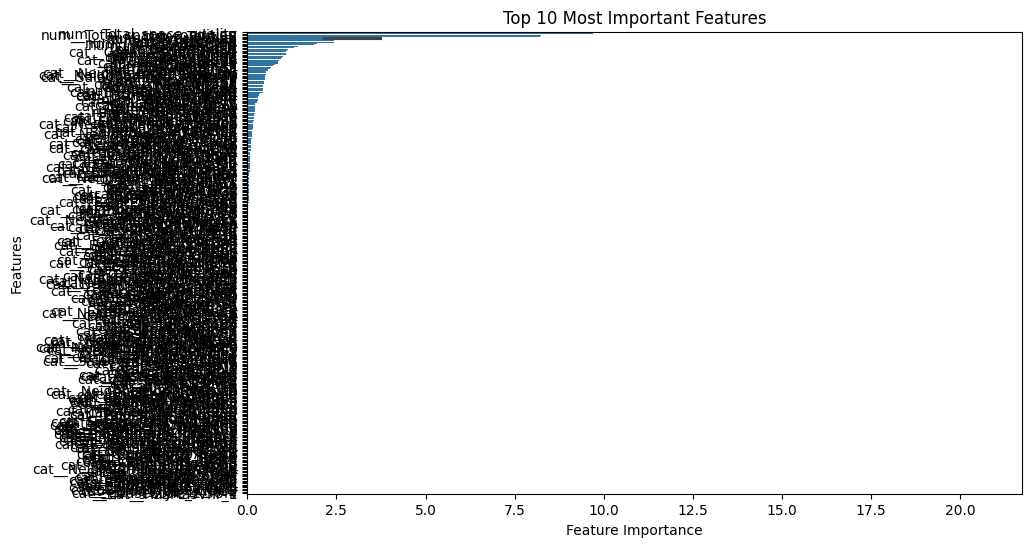

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])
plt.title("Top 10 Most Important Features")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()


In [116]:
threshold = 0.5  # Adjust based on analysis
important_features = feature_importance_df[feature_importance_df["Importance"] >= threshold]["Feature"].tolist()

# Extract base feature names (removing prefix like 'num__' or 'cat__')
important_features_cleaned = list(set(feat.split("__")[-1] for feat in important_features))

print(f"✅ Cleaned Important Features: {important_features_cleaned}")


✅ Cleaned Important Features: ['Total_space_condition', 'GarageYrBlt', 'BsmtUnfSF', 'GrLivArea', 'BsmtFinSF1', 'GarageArea', 'YearRemodAdd', 'GarageCars', 'PropertyAge', 'OverallQual', 'TotalBathrooms', '1stFlrSF', 'BsmtQual_Gd', 'Functional_Typ', 'Total_space_quality', 'FireplaceQu_None', 'CentralAir_N', 'TotalSF', 'TotalPorchSF', '2ndFlrSF', 'MSZoning_RM', 'Neighborhood_Edwards', 'HeatingQC_Ex', 'SaleCondition_Abnorml', 'BsmtQual_TA', 'YearBuilt', 'GarageFinish_None', 'Neighborhood_Crawfor', 'HasFireplace_0', 'ExterQual_TA', 'OverallCond', 'LotArea']


In [117]:
# Apply feature engineering FIRST
df_transformed = feature_engineering_transformer.fit_transform(df_train)

# Extract **all** numerical and categorical features after transformation
all_numerical = df_transformed.select_dtypes(include=[np.number]).columns.tolist()
all_categorical = df_transformed.select_dtypes(exclude=[np.number]).columns.tolist()

# Filter numerical columns based on feature importance AFTER transformation
numerical_columns = [col for col in all_numerical if col in important_features_cleaned]
categorical_columns = [col for col in all_categorical if col in important_features_cleaned]

# Debugging
print(f"🟢 Numerical Columns After Transformation: {numerical_columns}")
print(f"🟢 Categorical Columns After Transformation: {categorical_columns}")

# Ensure there are selected features
if not numerical_columns and not categorical_columns:
    print("⚠️ Warning: No important features selected! Adjust threshold or check feature names.")

# Update preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ], remainder='passthrough')

# Create a pipeline with the preprocessor and feature engineering
pipeline_ife = Pipeline(steps=[
    ('preprocessor', preprocessor)  # Feature engineering is already applied
])

# Transform X with updated columns
X = df_transformed[numerical_columns + categorical_columns]  # Now extract features
X_preprocessed_ife = pipeline_ife.fit_transform(X)  # Apply pipeline

# Debugging print
print(f"🔹 Final Shape of Transformed Data: {X_preprocessed_ife.shape}")


🟢 Numerical Columns After Transformation: ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PropertyAge', 'TotalBathrooms', 'TotalPorchSF', 'TotalSF', 'Total_space_quality', 'Total_space_condition']
🟢 Categorical Columns After Transformation: []
🔹 Final Shape of Transformed Data: (1460, 19)


In [118]:
# split the data into training and testing sets
X_train_ife, X_test_ife, y_train_ife, y_test_ife = train_test_split(X_preprocessed_ife, y, test_size=0.2, random_state=42)


# Train and evaluate the models
best_models_ife = {}

for model_name, config in models_params.items():
    model = config['model']
    param_grid = config['params']
    
    if param_grid:  # Tune if there are parameters to search
        search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
        search.fit(X_train_ife, y_train_ife)
        best_model_ife = search.best_estimator_
    else:
        best_model_ife = model  # Use default model for Linear Regression
    
    best_models_ife[model_name] = best_model_ife  # Store best model
    
    # Evaluate with cross-validation
    scores = cross_val_score(best_model_ife, X_train_ife, y_train_ife, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f'Best parameters for {model_name}: {best_model_fe.get_params()}')
    print(f"{model_name} Best RMSE: {rmse_scores.mean()}")


Best parameters for Linear Regression: {'loss_function': 'RMSE', 'verbose': 0, 'learning_rate': 0.05, 'iterations': 500, 'depth': 6}
Linear Regression Best RMSE: 0.1585349481206236
Best parameters for Random Forest: {'loss_function': 'RMSE', 'verbose': 0, 'learning_rate': 0.05, 'iterations': 500, 'depth': 6}
Random Forest Best RMSE: 0.14116258124276032
Best parameters for XGBoost: {'loss_function': 'RMSE', 'verbose': 0, 'learning_rate': 0.05, 'iterations': 500, 'depth': 6}
XGBoost Best RMSE: 0.13201242340469255
Best parameters for CatBoost: {'loss_function': 'RMSE', 'verbose': 0, 'learning_rate': 0.05, 'iterations': 500, 'depth': 6}
CatBoost Best RMSE: 0.12804590041292335


In [119]:
# Evaluate the best model on the test set
best_model = best_models_ife['CatBoost']
y_pred = best_model.predict(X_test_ife)
rmse = np.sqrt(mean_squared_error(y_test_ife, y_pred))
print(f"Test RMSE: {rmse}")

Test RMSE: 0.14225508184892327


In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor
# Split preprocessed features and target
X_train_fe, X_val_fe, y_train_fe, y_val = train_test_split(X_preprocessed_fe, y, test_size=0.2, random_state=42)

# Define base models with best parameters
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=200, min_samples_leaf=2, min_samples_split=5, random_state=42)),
    ('xgboost', XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)),
]

# Define CatBoost meta-model (with default parameters before tuning)
meta_model = CatBoostRegressor(loss_function='RMSE', learning_rate=0.05, iterations=500, depth=6, verbose=0)

# Create Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, passthrough=True)

# Define hyperparameter grid for tuning CatBoost meta-model
param_grid = {
    'final_estimator__iterations': [500, 1000],
    'final_estimator__learning_rate': [0.05, 0.1],
    'final_estimator__depth': [6, 8, 10]
}

# Perform GridSearchCV to find the best parameters for the meta-model
grid_search = GridSearchCV(stacking_model, param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)

# Train the tuned stacking model
grid_search.fit(X_train_fe, y_train_fe)

# Get best model
best_stacking_model = grid_search.best_estimator_

# Predict on validation set
y_pred_stack = best_stacking_model.predict(X_val_fe)

# Calculate RMSE
rmse_stack = np.sqrt(mean_squared_error(y_val, y_pred_stack))

print(f"✅ Best Stacking Model RMSE (CatBoost Meta-Model): {rmse_stack:.5f}")
print(f"🏆 Best CatBoost Meta-Model Parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
✅ Best Stacking Model RMSE (CatBoost Meta-Model): 0.12709
🏆 Best CatBoost Meta-Model Parameters: {'final_estimator__depth': 6, 'final_estimator__iterations': 1000, 'final_estimator__learning_rate': 0.05}


In [ ]:
#Best parameters for Linear Regression: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
#Linear Regression Best RMSE: 0.1508473860331942
#Best parameters for Random Forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
#Random Forest Best RMSE: 0.13857395183428856
#Best parameters for XGBoost: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 1.0, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
#XGBoost Best RMSE: 0.12694397041410288
#Best parameters for CatBoost: {'loss_function': 'RMSE', 'verbose': 0, 'learning_rate': 0.05, 'iterations': 500, 'depth': 6}
#CatBoost Best RMSE: 0.12046253260059461

In [130]:
X_train_preprocessed, X_val_fe, y_train_fe, y_val = train_test_split(X_preprocessed_fe, y, test_size=0.2, random_state=42)

In [ ]:

# Define parameter grid
param_grid = {
    'iterations': [1000, 1500, 2000],
    'depth': [4, 6, 8],
    'learning_rate': [0.03, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5]
}

# Initialize model
catboost = CatBoostRegressor(loss_function='RMSE', verbose=0)

# GridSearch
grid_search = GridSearchCV(catboost, param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_preprocessed, y_train_fe)

# Best parameters & score
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

Best Parameters: {'depth': 4, 'iterations': 1500, 'l2_leaf_reg': 1, 'learning_rate': 0.03}
Best RMSE: 0.11897973822094887


In [134]:
df_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [142]:
# Apply the same preprocessing pipeline
df_test_preprocessed = pipeline_fe.transform(df_test)

# Train the best CatBoost model on full data
best_catboost = CatBoostRegressor(
    depth=4, iterations=1500, l2_leaf_reg=1, learning_rate=0.03, loss_function='RMSE', verbose=0
)

# Fit the model on the full training data
best_catboost.fit(X_train_preprocessed, y_train_fe)  # Ensure correct training data is used

# Predict on test set (log scale)
y_test_pred_log = best_catboost.predict(df_test_preprocessed)  

# Convert back to original scale
y_test_pred = np.exp(y_test_pred_log)  

# Create DataFrame
submission = pd.DataFrame({'Id': df_test.index, 'SalePrice': y_test_pred})

# Save as CSV
submission.to_csv('submission.csv', index=False)

print("✅ Submission file saved successfully!")


✅ Submission file saved successfully!
